<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/hf_finetunning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 * page : https://huggingface.co/course/fr/chapter3/3?fw=tf
 * video :
   * https://www.youtube.com/watch?v=rnTGBy2ax1c&ab_channel=HuggingFace
   * https://www.youtube.com/watch?v=AUozVp78dhk&ab_channel=HuggingFace
   * https://www.youtube.com/watch?v=cpzq6ESSM5c&ab_channel=HuggingFace
   * https://www.youtube.com/watch?v=nx10eh4CoOs&ab_channel=HuggingFace

In [2]:
!pip install datasets transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 5.0 MB/s 
     |████████████████████████████████| 4.4 MB 64.0 MB/s 
     |████████████████████████████████| 1.1 MB 71.0 MB/s 
     |████████████████████████████████| 140 kB 64.4 MB/s 
     |████████████████████████████████| 212 kB 66.0 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 
     |████████████████████████████████| 596 kB 65.5 MB/s 
     |████████████████████████████████| 127 kB 77.1 MB/s 
     |████████████████████████████████| 271 kB 73.0 MB/s 
     |████████████████████████████████| 144 kB 71.3 MB/s 
     |████████████████████████████████| 94 kB 4.5 MB/s 
     |████████████████████████████████| 6.6 MB 57.0 MB/s 
     |████████████████████████████████| 1.2 MB 60.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib

# Data we need

In [3]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
import numpy as np

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Parameter 'function'=<function tokenize_function at 0x7f4ebc8daf80> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [4]:
next(iter(tf_train_dataset))[1] # tensor labels

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([0, 0, 1, 0, 0, 1, 1, 0])>

In [5]:
next(iter(tf_train_dataset))[0]["input_ids"] # tensor input_ids

<tf.Tensor: shape=(8, 64), dtype=int64, numpy=
array([[  101,  2005,  2742,  1010, 27088,  2056,  1010,  2336,  4050,
         7438,  1037,  2322,  1011, 19471, 14904,  5835,  2004,  2028,
         3529,  1010,  2348,  2009,  2941,  3397,  1016,  1092,  1022,
         1011, 19471,  3529,  2015,  1012,   102, 27088,  2056,  2336,
         4050,  7438,  1037,  2322,  1011, 19471, 14904,  5835,  2004,
         2028,  3529,  1010,  2096,  2009,  2941,  3397,  1016,  1012,
         1019,  1012,   102,     0,     0,     0,     0,     0,     0,
            0],
       [  101, 18928,  6927,  3389,  2003,  3271,  2013,  1037,  4946,
         1999, 15302, 12801,  1010,  9317,  1012,   102, 18928,  6927,
         3389,  1010,  4090,  1010,  2003,  3491,  1999,  2023,  6302,
         2207,  2011,  1996,  2610,  1999, 15302, 12801,  1010,  6928,
         1012,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,

# Fine Tuning avec Keras

In [6]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
# Signifie qu'on va télécharger le pretrained model de BERT et qu'on va rajouter un layer afin de classifier les sentences selon deux labels

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer="adam",
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
)

# Que du très classique ici

459/459 [==============================] - 93s 159ms/step - loss: 0.6985 - accuracy: 0.6210 - val_loss: 0.6254 - val_accuracy: 0.6838


### Learning rate decay

Apparemment, les transformers ont besoin d'un learning rate beaucoup plus faible que celui programmé par défaut sur keras. En général, il est préconisé un learning rate par défaut de 5e-5 (0,00005). De plus il est préférable de faire décroitre ce learning rate en fonction de temps, de sorte qu'il soit de plus en plus petit via ce qu'on appelle un scheduler. 

In [21]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

batch_size = 8
num_epochs = 3
num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=lr_scheduler)

Le learning rate scheduler d'après un polynomial decay

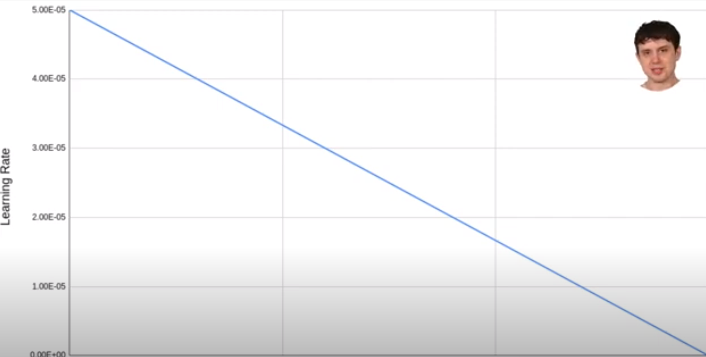

In [22]:
### Nouvelle tentative avec le learning rate scheduler

import tensorflow as tf

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])
model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=3)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
459/459 [==============================] - 88s 157ms/step - loss: 0.5535 - accuracy: 0.7124 - val_loss: 0.4250 - val_accuracy: 0.7794
Epoch 2/3
459/459 [==============================] - 71s 155ms/step - loss: 0.3002 - accuracy: 0.8852 - val_loss: 0.3792 - val_accuracy: 0.8407
Epoch 3/3
459/459 [==============================] - 71s 156ms/step - loss: 0.0902 - accuracy: 0.9714 - val_loss: 0.4535 - val_accuracy: 0.8603


In [24]:
model.summary()
# Comme on peut le voir, c'est un réel fine tunning, aucun poids n'a été freeze out, tout les poids sont là

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


### Predictons

In [36]:
preds = model.predict(tf_validation_dataset)["logits"]
# Le format de sortie est etrange on dirait un tensor de type transformer, ca ressemble à un dict
print(preds.shape)

class_preds = np.argmax(preds, axis=1)
# Selectionner la classe avec le logit le plus élevé comme prédictions

(408, 2)


In [37]:
from datasets import load_metric

metric = load_metric("glue", "mrpc")
metric.compute(predictions=class_preds, references=raw_datasets["validation"]["label"])

# Apparemment on peut charger des métriques liées à un dataset particulier en loccurence mrpc du benchmark glue

{'accuracy': 0.8602941176470589, 'f1': 0.9028960817717206}

### Custom training loop possible avec TF?

Pour une raison que j'ignore il semble ne pas y avoir de tutoriel sur une custom training loop avec tensorflow, contrairement à pytorch pour lequel y'a un tuto. Du coup, je laisse la question en suspens en attendant de savoir si c'est possible. Je pense que oui à priori.